In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import time
from math import ceil
import scipy.stats


# Task 7

## Task 7.1 Метод случайного поиска
Методом случайного поиска найти минимальное значение функции $f$ на множестве $A = \{x_1, x_2: x_1^2+x_2^2 \leq 1\}$, где  
$$f(x) = x_1^3 \sin \dfrac{1}{x_1} + 10 x_1 x_2^4 \cos \dfrac{1}{x_2}$$
при $x_1 = 0$ или $x_2 = 0$ функция доопределяется по непрерывности  
\
Будем $n$ раз разыгрывать пару случайных величин $x_1, x_2$ и выбирать наименьшее $f(x_1, x_2)$. Для моделирования перейдем сначала в полярные координаты: $x_1 = r \cos \phi, x_2 = r \sin \phi$:
$$1 = \iint\limits_{A}\dfrac{1}{\pi} dx_1 dx_2 = \dfrac{1}{\pi} \int_0^1 r dr \int _0^{2\pi} d \phi = \int_0^1 2r dr \int _0^{2\pi} \dfrac{1}{2\pi} d \phi$$
То есть можно сказать, что мы имеем с.в. $\phi \sim U[0, 2\pi]$ и $r$, имеющую плотность $p_r(x) = 2x [x \in [0, 1]] $ и функцию распределения $F_r(x) = x^2 [x \in [0, 1]] + [x > 1]$.  
Для моделирования r воспользуемся методом обращения функции распределения, т.е. генерируем $\xi \sim U[0, 1]$, находим $r = F_r^{-1}(\xi) = \sqrt \xi$

In [133]:
def f(x, y):
    res = np.zeros(x.shape)
    not_zero_mask = np.where(abs(x*y) > 1e-12)
    x_nz, y_nz = x[not_zero_mask], y[not_zero_mask]
    res[not_zero_mask] = x_nz**3 * np.sin(1/x_nz) + \
                        10*x_nz*(y_nz**4)*np.cos(1/y_nz)
    return res

In [130]:
n = int(1e6)

phi = 2*np.pi* np.random.rand(n)
r = np.sqrt(np.random.rand(n))


x = r * np.cos(phi)
y = r * np.sin(phi)
f_res = f(x, y)
idx_min = np.argmin(f_res)
x_min, y_min, f_min = x[idx_min], y[idx_min], f_res[idx_min]


print('x_min, y_min = ', x_min, y_min)
print('f_min = ', f_min)

x_min, y_min =  -0.3547833334893437 0.9349195625828262
f_min =  -1.2881610310413494


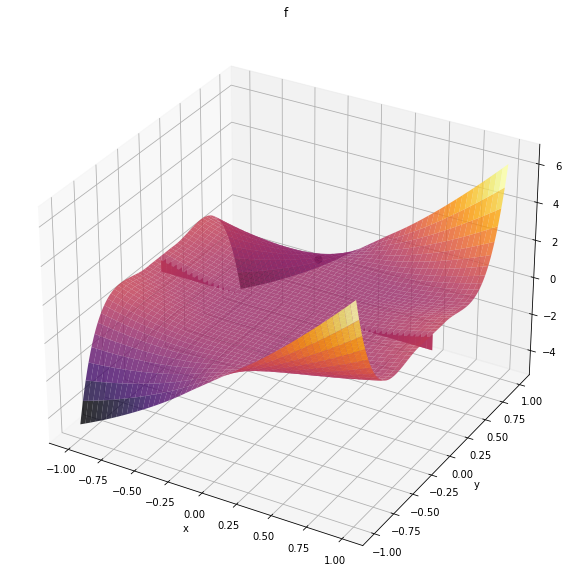

In [135]:
x, y = np.mgrid[-1:1:0.001, -1:1:0.001]
z = f(x, y)
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_min, y_min, f_min, c='black', s=50, alpha=1)
ax.plot_surface(x, y, z, cmap='inferno', alpha=.8)

plt.title('f')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Точность вычислений
Пусть $(x_0, y_0)$ - точка теоретического минимума функции. Тогда
$$|f(x_0, y_0) - f(x, y)| \leq \max_{(x, y) \in A}|\nabla f| |(x_0, y_0) - (x, y)| $$  
Оценим максимум градиеента $|\nabla f| = \sqrt{ \biggl( \dfrac{\partial f}{\partial x_1} \biggr)^2 + \biggl( \dfrac{\partial f}{\partial x_2} \biggr)^2}$  
\
$$ \biggl| \dfrac{\partial f}{\partial x_1} \biggr| = \biggl| 3x_1^2 \sin \dfrac{1}{x_1} - x_1 \cos \dfrac{1}{x_1} + 10 x_2 \cos \dfrac{1}{x_2}\biggr| \leq 3x_1^2 + |x_1| + 10x_2^4 \leq 14$$
\
\
$$\biggl| \dfrac{\partial f}{\partial x_2} \biggr| = \biggl| 40 x_1 x_2^3 \cos \dfrac{1}{x_2} + 10 x_1 x_2^2 \sin \dfrac{1}{x_2} \biggr| \leq  40 |x_1| |x_2|^3 + 10 |x_1||x_2|^2 \leq 50$$
\
\
Оценим $|(x_0, y_0) - (x, y)|$, где $(x, y)$- наша случайная величина.  
Пусть $p$ - вероятность, что хотя бы одна из $n$ случайных точек попала в $\delta$-окрестность точки минимума.
* Если точка минимума лежит на границе $A$ (тогда попадает половина окрестности), то $p = 1 - \biggl(1 - \dfrac{2 \dfrac{1}{2} \pi \delta^2}{\pi 1^2} \biggr)^n = 1 - (1-\delta^2)^n$
* Если точка минимума лежит внутри множества $A$, то $p = 1 - \biggl(1 - \dfrac{2 \pi \delta^2}{\pi 1^2} \biggr)^n = 1 - (1-2\delta^2)^n$

Значит, в худшем случае $\delta = \sqrt{1-(1-p)^{\dfrac{1}{n}}} = \sqrt{1 - (1 - \dfrac{p}{n})} =\sqrt{\dfrac{p}{n}} $

Получили
$$ |f(x_0, y_0) - f(x, y)| \leq 52 \sqrt{\frac{p}{n}} \leq \varepsilon$$
Откуда $$n \geq 52^2 \dfrac{p}{\varepsilon^2}$$
При $p=0.99, \ \varepsilon = 0.01, \ n \approx 2.6 \cdot 10^7$  
При таком значении:

In [137]:
n = int(2.6 * 1e7)

phi = 2*np.pi* np.random.rand(n)
r = np.sqrt(np.random.rand(n))


x = r * np.cos(phi)
y = r * np.sin(phi)
f_res = f(x, y)
idx_min = np.argmin(f_res)
x_min, y_min, f_min = x[idx_min], y[idx_min], f_res[idx_min]


print('x_min, y_min = ', x_min, y_min)
print('f_min = ', f_min)

x_min, y_min =  -0.3583417911264346 0.9335896168432862
f_min =  -1.288469107432794


## Task 7.2  Метод имитации отжига (Simulated annealing)
Методом имитации отжига найти минимальное значение функции Розенброка $g(x)$ в пространстве $\mathbb{R}^2$  
[Алгоритм имитации отжига](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0)

**Основные шаги алгоритма**:  
1. Случайным образом выбирается начальная точка $x= x_0; x_0 \in S$ и начальная температура $T_0$. 
2. k-я итерация основного цикла состоит из следующих шагов:  
    (a) Сгенерировать новую точку $(x_{k+1},y_{k+1}) $ как функцию от старой точки и температуры на k шаге  
    (b) Вычислить значение функции в ней $F(x_{k+1},y_{k+1})$.  
    (c) Перейти в новую точку с вероятностью 
    $$  p =  \begin{cases}
               1, & F(x_{k+1},y_{k+1}) < F(x_{k},y_{k})\\
               \exp(-\dfrac{\Delta F_k}{T_k}), &\text{иначе}
             \end{cases}$$
     где $\Delta F_k = F(x_{k+1},y_{k+1}) - F(x_{k},y_{k})$  
    (d) Уменьшение температуры, пока она не станет меньше порога

Реализуем Больцмановский отжиг, где функция температуры выглядит:
$T(k) = \dfrac{T_0}{\ln(k+1)}$  
и новая точка $(x_{k+1},y_{k+1}) \sim \mathcal{N}((x_{k+1},y_{k+1}) | (x_{k},y_{k}), T_k)$

In [202]:
def g(x, y):
    return (x-1)**2 + 100*(y-x**2)**2

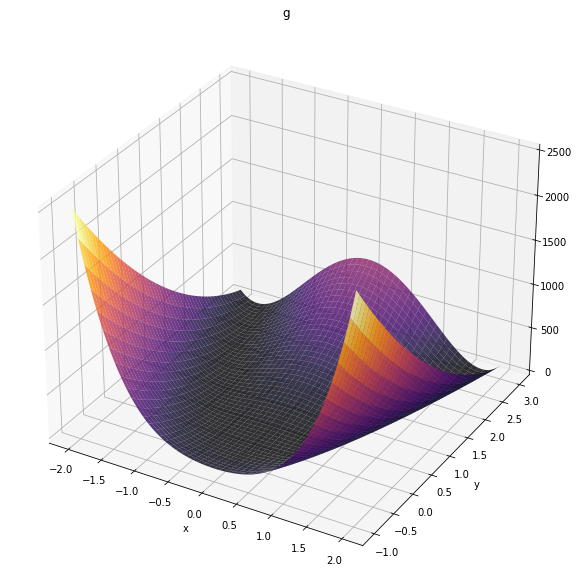

In [200]:
x, y = np.mgrid[-2:2:0.001, -1:3:0.001]
z = g(x, y)
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='inferno', alpha=.8)

plt.title('g')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Данная функция имеет глобальный минимум в точке (1, 1), где $g(1, 1)=0$

In [238]:
def annealing(func, t0, x0, y0):
    def neighbour(x, y, t):
        return np.random.normal([x, y], t)

    def cooling(i):
        return t0 / np.log(i+1)

    def coord_new(x, y, t, i):
        t = cooling(i)
        x_new, y_new = neighbour(x, y, t)
        diff = func(x_new, y_new) - func(x, y)
        
        if diff < 0:
            return x_new, y_new, t, diff, 1
        p = np.exp(-diff/t)

        accept = np.random.rand() < p
        if accept:
            return x_new, y_new, t, diff, 1
        else:
            return x, y, t, -1, 0

    start = time()
    iterations = 1
    accept = 0
    x, y, t = x0, y0, t0
    diff = -1
    while abs(diff)>1e-8 and iterations < int(1e7):
        x, y, t, diff, acc = coord_new(x, y, t, iterations)
        accept += acc
        iterations += 1
    iterations -= 1
    return func(x, y), x, y, accept / iterations, iterations, time() - start

Легенда гласит, что если поставить большую начальную температуру и долго ждать, то алгоритм сойдется:

In [240]:
t0 = 10
x0 = 3
y0 = 3
g_min, x_min, y_min, accept_ratio, iterations, tm = annealing(g, t0, x0, y0)
print('Минимум функции {:5f}'.format(g_min))
print('точка минимума функции ({:5f}, {:5f})'.format(x_min, y_min))
print('Доля принятия точек {:5f}'.format(accept_ratio))
print('общее число итераций {:d}'.format(iterations))
print('общее время работы {:5f}'.format(tm))

Минимум функции 0.165514
точка минимума функции (1.406608, 1.979901)
Доля принятия точек 0.048473
общее число итераций 9999999
общее время работы 265.123440


Сравним со стандартным методом оптимизации, который вышел из той же точки:

In [138]:
from scipy.optimize import minimize, rosen

res = minimize(rosen, [x0, y0], method='CG', tol=1e-6)
print(res)

     fun: 2.7228998559315853e-12
     jac: array([ 2.27678204e-05, -5.29118038e-06])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 439
     nit: 24
    njev: 107
  status: 2
 success: False
       x: array([1.00000161, 1.0000032 ])


# Task 8
## Решение первой краевой задачи методом Монте-Карло
Применить метод Монте–Карло к решению первой краевой задачи для двумерного
уравнения Лапласа в единичном круге:  


Будем искать численное решение по **алгоритму**:
1. Построим равномерную сетку. Выделим на ней внутренние и граничные точки множества 𝐷. Граничными точками назовем такие точки, которые имеют менее четырёх соседей из 𝐷.
2. В граничных точках положим $u(x, y) = f(x, y)$.
3. Во внутренних точках $(x, y)$ будем производить следующие действия:   
   (a) n раз т. $(x, y)$ отправим точку блуждать, пока она не достигнет граничной точки $(x^{(k)}, y^{(k)})$ (с равной вероятностью будем переходить в одну из соседних точек).  
   (b) Положим в данной внутренней точке $u(x, y) = \dfrac{1}{n} \sum_{k=1}^n f(x^{(k)}, y^{(k)})$

Будем считать точку внутренней, если она и ее 4 соседа лежат внутри области. Также я считаю, что точки, для которых такой подсчет дает 3 или 4 являются граничными, а остальные (0, 1 и 2) лежат вне области.

In [398]:
def dirichlet_monte_carlo_matrix(X, Y, niter=10**6):
    def f(x, y):
        return x**2 - y**2

    D = X**2 + Y**2 <= 1

    
    int_D = np.zeros(X.shape, dtype=int)
    int_D[1:X.shape[0]-1,1:X.shape[1]-1] = 1*D[1:X.shape[0]-1,1:X.shape[1]-1] +\
                                           D[0:X.shape[0]-2,1:X.shape[1]-1] +\
                                           D[2:X.shape[0],1:X.shape[1]-1] +\
                                           D[1:X.shape[0]-1,0:X.shape[1]-2] +\
                                           D[1:X.shape[0]-1,2:X.shape[1]]
    
    int_D[int_D <= 2] = 0
    int_D[(int_D > 2) *  (int_D < 5)] = 1

    pos_x, pos_y = np.where(int_D == 1)
    pos = np.array([pos_x[0], pos_y[0]])
    temp = f(X[pos], Y[pos])

    direc = np.zeros(2)
    for d in [[-1, 0], [1, 0], [0, -1], [0, 1]]:
        d = np.array(d)
        pos_next = pos+d
        if int_D[pos_next[0], pos_next[1]] == 5:
            direc = -d
            break
    
    temp_sum = np.zeros(X.shape)
#     temp_sum[int_D != 5] = np.inf
    n_visit = np.zeros(X.shape)
#     n_visit[int_D != 5] = np.inf

    for i in range(niter):
        if int_D[pos[0], pos[1]] == 1:
            temp = f(X[pos], Y[pos])
            direc = -direc
        elif int_D[pos[0], pos[1]] == 5:
            direc = np.zeros(2, dtype=int)
            direc[np.random.randint(2)] = 2*np.random.randint(2)-1
            
            temp_sum[pos] += temp
            n_visit[pos] += 1
        else:
            print('ALARM')
            print('Take another grid')
            break
    
        pos += direc

    u = temp_sum/n_visit
    return u

In [401]:
h = 0.01

# нужно задавать сетку так, чтобы она немного выходила за границу, чтобы эту границу потом найти
X, Y = np.mgrid[-1.01:1.2:h, -1.01:1.2:h]
u = dirichlet_monte_carlo_matrix(X, Y, niter=10**5)

C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


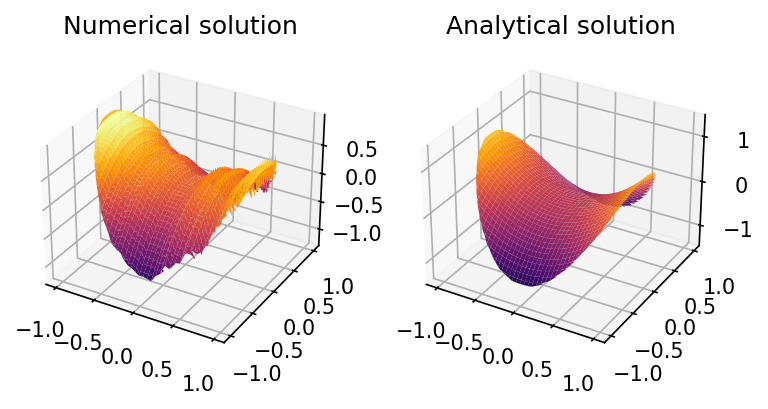

In [402]:
fig = plt.figure()
fig.dpi = 150

# при изображении, все точки, в которых не посчиталось или не попали в круг - отнесем в бесконечность
X_num = X.copy()
X_num[X**2 + Y**2 > 1] = np.inf
bad_val = np.isnan(u)
X_num[bad_val] = np.inf
u[bad_val] = 0

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X_num, Y, u, cmap='inferno')
plt.title('Numerical solution')

ax = fig.add_subplot(122, projection='3d')
u_analytical = X**2 - Y**2
X[X**2 + Y**2 > 1] = np.inf
ax.plot_surface(X, Y, u_analytical, cmap='inferno')
plt.title('Analytical solution')
plt.show()

Text(0.5, 0.92, 'Residual')

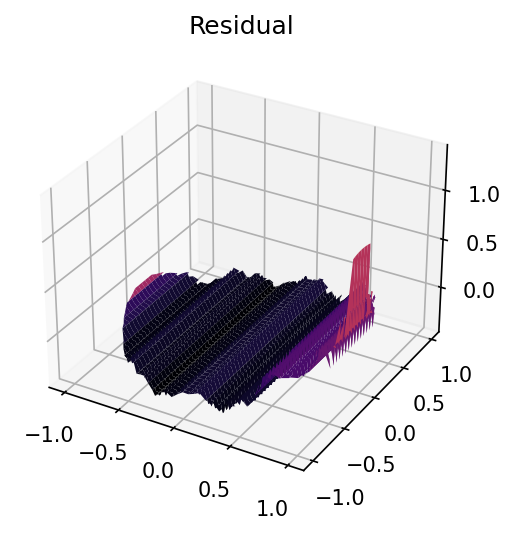

In [405]:
fig = plt.figure()
fig.dpi = 150

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u_analytical - u, cmap='inferno')
plt.title('Residual')

# fig.savefig('/pictires/8_3.pdf', bbox_inches='tight')

# Task 9
# Винеровский процесс и процесс Орнштейна-Уленбека

#### Рассмотреть два вида процессов:
- Винеровский процесс $W(t), t \in [0, 1], \ W(0) = 0.$

- Процесс Орнштейна-Уленбека $X(t),\ t \in [0, 1], \ X(0) = X_0$, то есть стационарный марковский гауссовский процесс. Начальное значение $X_0$ генерируется случайным образом так, чтобы полученный процесс бы стационарным.


## Task 9.1
### Найти ковариационную функцию и переходные вероятности.

#### Винеровский процесс

Случайный процесс $W(t)$, где $t \geq 0$ назывыается Винеровским процессом, если
- $W(t)$ - процесс с независимыми приращениями
- $W(0) \overset{\text{п.н.}}{=} 0$
- $W(t + h) - W(t) \sim \mathcal{N}(0, \sigma^2h), \forall t \geq 0, h > 0$

Найдем его *ковариационную функцию функцию*:  
Так как $W(t) \sim W(0) + \mathcal{N}(0, \sigma^2 t) \sim \mathcal{N}(0, \sigma^2 t)$, то $\mathbb{E}W(t) = 0$   
$$ K(t_1, t_2) = \mathbb{E}\biggl[ (W(t_1) - \mathbb{E}W(t_1))(W(t_2) - \mathbb{E}W(t_2))\biggr] =  \mathbb{E}\biggl[W(t_1)W(t_2)\biggr] = \{t_1 < t_2\} = \mathbb{E}\biggl[W(t_1)(W(t_2)-W(t_1)+W(t_1))\biggr] = \\
= \mathbb{E}W^2(t_1) +  + \mathbb{E}W(t_1)\mathbb{E}[W(t_2) - W(t_1)] = \sigma^2 t_1,$$
Откуда $K(t_1, t_2) = \sigma^2 \min(t_1, t_2).$
\
\
\
Найдем *переходные вероятности*:
Пусть $t_1 < t_2 < t_3$, нас интересует распределение $P(W(t_2)=x_2|W(t_1) = x_1, W(t_3) = x_3)$. 
Так как $W(t)$ имеет нормальное распределение с параметрами $0$ и $\sigma^2t$, $Y$ имеет плотность
$$P(W(t_2)=x_2|W(t_1) = x_1, W(t_3) = x_3) = \dfrac{P(W(t_1) = x_1, W(t_2)=x_2, W(t_3) = x_3)}{P(W(t_1) = x_1, W(t_3) = x_3)}$$

Известно, что плотность $n$-мерного нормального распределения с матожиданием $\mu$ и ковариационной матрицей $\Sigma$ имеет вид
\begin{equation}
P(x) = \dfrac{1}{\sqrt{(2\pi)^n|\Sigma|}}\exp\left\{-\frac{1}{2} (x - \mu)^T\Sigma^{-1} (x - \mu)\right\},
\end{equation}
где $x = (x_1, \dots, x_n), \ \Sigma_{ij} = cov(x_i, \, x_j).$  

Так как $K(t_i, t_j) = \sigma^2 \min(t_i, t_j)$, получаем следующие ковариационные матрицы
$$
\Sigma_{13} = \sigma^2 \begin{pmatrix} 
t_1 & t_1 \\
t_1 & t_3
\end{pmatrix},
\text{- для } W(t_1), W(t_3)
$$
$$
\Sigma_{123} = \sigma^2 \begin{pmatrix}
t_1 & t_1 & t_1 \\
t_1 & t_2 & t_2 \\
t_1 & t_2 & t_3
\end{pmatrix}
\text{- для } W(t_1), W(t_2), W(t_3)
$$
\
\
Подставим их и найдем распреление:  
$P(W(t_2)=x_2|W(t_1) = x_1, W(t_3) = x_3) = Const \exp\left\{ -\dfrac12\dfrac{4}{(t_3 - t_1)\sigma^2} \left(x_2 - \dfrac{x_1 + x_3}2\right)^2\right\}$  
То есть $P(W(t_2)|W(t_1) = x_1, W(t_3) = x_3) = \mathcal{N}\left(W(t_2)|\dfrac{x_1 + x_3}{2}, \dfrac{(t_3-t_1)\sigma^2}{4}\right).$


#### Процесс Орштейна-Уленбека
Процесс Орнштейна-Уленбека - гауссовский процесс, являющийся стационарным и обладающий марковским свойством.

*Ковариационная функция*
Из этих свойств следует, что для  процесса будет выполняться равенство:
$$corr(X(t_1), X(t_3)) = corr(X(t_1), X(t_2))corr(X(t_2), X(t_3)), \quad \forall t_1 < t_2 < t_3,$$
и что также $$K(t, s) = k(|t-s|),$$
откуда $corr(t_3-t_1) = corr(t_2-t_1) corr(t_3-t_2)$.  
То есть $$corr(t+s) = corr(t)corr(s). $$
Обозначим $f(x) = \ln corr(x)$, тогда прологорифмировав прошлое равенство, получим $f(t+s) = f(t) + f(s)$. Это уравнение Коши, решением является линейная функция $f(x) = ax$,  то есть 
$$corr(x) = \exp{f(x)} = e^{ax}$$


Без ограничения общности X(0) = 0. Тогда $X(t) \sim \mathcal{N}(0, \sigma^2),$ и $k(|t-s|) = \sigma^2 corr(t, s),$ 


Так как ковариационная функция огранниченна, то окончательный вид ковариационной функции:
$$K(t, s) = k(|t-s|) = \sigma^2 e^{-\theta |t-s|}, \theta > 0$$
\
\
\
Найдем *переходные вероятности*:  
Аналогично Винеровскому процессу нужно получить ковариационные матрицы с.в. $X(t_1), X(t_2) и X(t_3) , \quad \forall t_1 < t_2 < t_3$:  
$$
\Sigma_{13} = \sigma^2 \begin{pmatrix} 
1 & e^{-\theta (t_3 - t_1)} \\
e^{-\theta (t_3 - t_1)} & 1
\end{pmatrix},
\text{- для } X(t_1), X(t_3)
$$
$$
\Sigma_{123} = \sigma^2 \begin{pmatrix}
1 & e^{-\theta (t_2 - t_1)} & e^{-\theta (t_3 - t_1)} \\
e^{-\theta (t_2 - t_1)} & 1 & e^{-\theta (t_3 - t_2)} \\
e^{-\theta (t_3 - t_1)} & e^{-\theta (t_3 - t_2)} & 1
\end{pmatrix}
\text{- для } X(t_1), X(t_2), X(t_3)
$$
Обозначим шаг новой сетки за $h = t_2 - t_1 = t_3 - t_2$ и аналогично найдем результирующее распределение:
$$P(X(t_2)=x_2|X(t_1) = x_1, X(t_3) = x_3) = \dfrac{P(X(t_1) = x_1, X(t_2)=x_2, X(t_3) = x_3)}{P(X(t_1) = x_1, X(t_3) = x_3)}$$
После преобразований получим $$P(X(t_2)|X(t_1) = x_1, X(t_3) = x_3) = \mathcal{N}\left(X(t_2)|\dfrac{x_1 + x_3}{e^{\theta h} + e^{-\theta h}}, \dfrac{\sigma^2 (e^{2\theta h} - 1)}{e^{2\theta h} + 1} \right)$$


## Task 9.2-9.3

### Промоделировать независимые траектории процесса с данными переходными вероятностями методом добавления разбиения отрезка и построить графики траекторий.

**Метод добавления разбиения отрезка**:  
Пусть требуется смоделировать случайный процесс $X(t)$ на отрезке $[0, 1]$. 
1. Моделируется $X_0 = X(0)$.
2. Моделируется $X(1)$ по условному распределению $P(X(1)|X(0))$.
3. По знанию процесса в узлах сетки $t_1, t_2$ моделируем процесс в узле $t = \dfrac{t_1 + t_2}{2}$, используя условное распределение случайной величины $[X(t)|X(t_1) = x_1, X(t_2) = x_2]$.
4. Разбиение отрезка продолжается, пока сетка не станет достаточно мелкой.

### Винеровский процесс

В случае Винеровского процесса $P(X(1) | X(0)) = \mathcal{N} (X(1) | 0, \sigma^2)$.  
$P(W(t_2)|W(t_1) = x_1, W(t_3) = x_3) = \mathcal{N}\left(W(t_2)|\dfrac{x_1 + x_3}{2}, \dfrac{(t_3-t_1)\sigma^2}{4}\right).$

Также будем пользоваться свойством:
$$X = a + bY, \text{где }  X \sim \mathcal{N}(a, b^2), \ Y \sim \mathcal{N}(0, 1)$$

Если мы хотим иметь k точек процесса, то найдем, какое минимальное количество раз нужно измельчать сетку, чтобы получить не менее k точек.  
За n операций измельчения получим $1+2+\dots+2^{n-1} = 2^n - 1$ точек + исходные 2.
То есть мы хотим, чтобы $k \leq 2^n+1$, откуда
$$n \geq \log_2{(k-1)}$$

In [97]:
# моделирует k точек винеровского процесса
def WienerProcess(sigma, k):
    n = ceil(np.log(k-1)/np.log(2))
    W = np.zeros(2**n+1)
    W[-1] = sigma * np.random.randn()
    step = 2**n
    h = 1
    for i in range(n):
        W[step//2::step] = (W[:-1:step] + W[step::step]) / 2 + np.sqrt(h / 4) * sigma * np.random.randn(2**i)
        step = step // 2
        h /= 2
    
    # вернем требуемые k и точки, где посчитан процесс
    points = np.linspace(0, 1, 2**n+1)
    idx = np.arange(k-1)
    idx = np.append(idx, -1)
    return points[idx], W[idx]

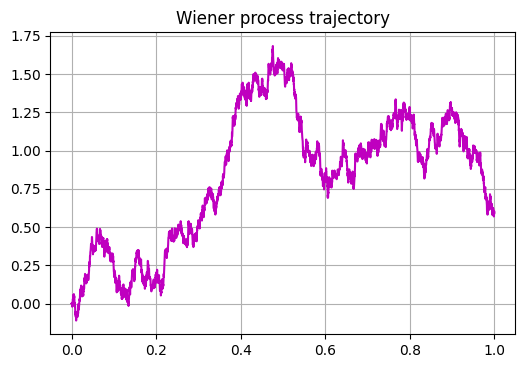

In [280]:
# будет красивее, если k - степени 2
k = 2**12
sigma = 1
t, W = WienerProcess(sigma, k)

fig, ax = plt.subplots()
fig.dpi = 100

ax.plot(t, W, 'm', ms = 1)
plt.title('Wiener process trajectory')
ax.grid()
plt.show()

### Процесс Орштейна-Уленбека
Для процесса Орштейна-Уленбека $P(X(1) | X(0)) = \mathcal{N} (X(1) | a, b),$ найдем параметры этого распределения.  
Ковариационная матрица для $(X(0), X(1))$ имеет вид 
$$
\Sigma = \sigma^2 \begin{pmatrix} 
1 & e^{-\theta} \\
e^{-\theta} & 1
\end{pmatrix}.
$$
Аналогично по формуле Байеса получим $P(X(1) | X(0)) = \mathcal{N} \biggl( X(1) | X(0)e^{-\theta}, \sigma^2 (1 -e^{-2\theta}) \biggr)$

$$P(X(t_2)|X(t_1) = x_1, X(t_3) = x_3) = \mathcal{N}\left(X(t_2)|\dfrac{x_1 + x_3}{e^{\theta h} + e^{-\theta h}}, \dfrac{\sigma^2 (e^{2\theta h} - 1)}{e^{2\theta h} + 1} \right), \text{где } h = \dfrac{t_3-t_1}{2}$$

In [129]:
# моделирует k точек винеровского процесса
def OUProcess(sigma, theta, k):
    n = ceil(np.log(k-1)/np.log(2))
    X = np.zeros(2**n+1)
    X[0] = sigma * np.random.randn()
    X[-1] = X[0] * np.exp(-theta) + sigma * np.sqrt(1 - np.exp(-2 * theta)) * np.random.randn()
    step = 2**n
    h = 1/2
    for i in range(n):
        X[step//2::step] = (X[:-1:step] + X[step::step]) / (np.exp(theta*h) + np.exp(-theta*h)) + \
                            sigma*np.sqrt((np.exp(2*theta*h) - 1)/(np.exp(2*theta*h) + 1)) * np.random.randn(2**i)
        step = step // 2
        h /= 2
    
    # вернем требуемые k и точки, где посчитан процесс
    points = np.linspace(0, 1, 2**n+1)
    idx = np.arange(k-1)
    idx = np.append(idx, -1)
    return points[idx], X[idx]

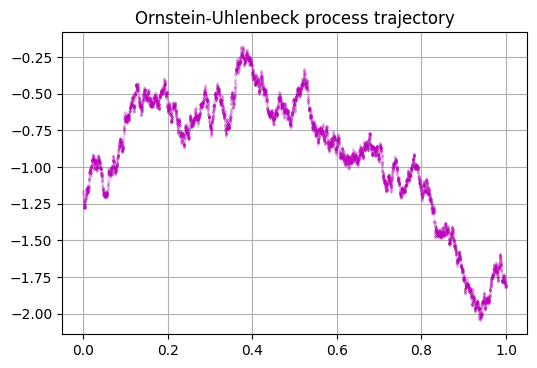

In [130]:
# будет красивее, если k = степени 2
k = 2**15
sigma=1
theta = 1
t, X = OUProcess(sigma, lam, k)

fig, ax = plt.subplots()
fig.dpi = 100

ax.plot(t, X, 'm.', ms = 0.1)
plt.title('Ornstein-Uhlenbeck process trajectory')
ax.grid()
plt.show()

# Task 10 Фильтрация процесса Орштейна-Уленбека

## Task 10.1
Используя генератор белого шума, добавить случайную ошибку с известной дисперсией к реализации процесса Орнштейна-Уленбека.

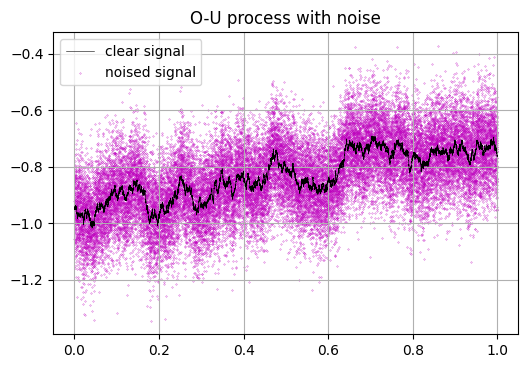

In [198]:
k = 2**15
sigma=1
theta = 0.05
t, X = OUProcess(sigma, theta, k)

r = 0.01
noise = np.sqrt(r) * np.random.randn(k)
Y = X + noise

fig, ax = plt.subplots()
fig.dpi = 100

ax.scatter(t, Y, c='m', s = 0.05, label='noised signal')
ax.plot(t, X, 'k', lw=0.4, label='clear signal')
plt.title('O-U process with noise')
ax.legend()
ax.grid()
plt.show()

## Task 10.2

[**Фильтр Калмана**](https://en.wikipedia.org/wiki/Kalman_filter)

При помощи одномерного фильтра Калмана оценить траекторию процесса по зашумленному сигналу. Параметры процесса и белого шума считать известными.

Рассмотрим сетку $\{t_n = nh, n = 0, 1, \ldots, N\},\ h = \dfrac1N$ и значения процесса Орнштейна-Уленбека в точках этой сетки
$x_n = X(t_n).$

Представим процесс в виде дискретной динамической системы вида
$$x_{n+1} = ax_n + \nu_n, \quad \mathrm{i.i.d.}\ \nu_n \sim \mathcal{N}(0, q), \quad x_1 \sim \mathcal{N}(0, \sigma^2).$$
Обозначим зашумленный сигнал
$$y_n = x_n + \varepsilon_n, \quad \mathrm{i.i.d.}\ \varepsilon_n \sim \mathcal{N}(0, r).$$
Параметры $\sigma, \theta$ процесса считаем известными. Значение дисперсии шума $r$ считается известным еще на этапе генерации этого шума.

Для определения коэффициентов уравнения динамики $a, q$ запишем ковариационную матрицу процесса в моменты $t_n$ и $t_{n+1}$:
$$K(t_n, t_n) = \mathrm{Var}(x_n) = \sigma^2,$$
$$K(t_n, t_{n+1}) = \sigma^2 e^{-\theta h} =  a\ \mathrm{Var}(x_n) + 0 = a\sigma^2,$$
$$K(t_{n+1}, t_{n+1}) = \mathrm{Var}(x_{n+1}) = \sigma^2 = a^2\mathrm{Var}(x_n) + q = a^2\sigma^2 + q.$$
Откуда
$$a = e^{-\theta h}, \quad q = \sigma^2(1 - a^2).$$

**Проход фильра Калмана**.  
Пусть мы на $n$ шаге, известны $y_1, \ldots y_n$.  
Обозначения:
- $\hat x_{n|n}$  - оценкa значения $x_n$
- $\hat x_{n+1|n}$ - экстраполяция процесса на следующий шаг в соответствии с динамической системой
- $p_{n|n}$ - дисперсия ошибки фильтрации
- $p_{n+1|n}$ - прогнозируемая на следующем шаге дисперсия.

Алгоритм фильтрации:
1. Прогнозируем значение процесса и дисперсию ошибки
$$ \hat x_{n+1|n} = a\hat x_{n|n}, \quad p_{n+1|n} = a^2 p_{n|n} + q.$$
2. Счиаем коэффициент усиления Калмана
$$ k_{n+1} = \dfrac{p_{n+1|n}}{p_{n+1|n} + r}$$
3. Корректируем предсказанное значение по формуле:
$$ \hat x_{n+1|n+1} = \hat x_{n+1|n} + k_{n+1}(y_{n+1} - \hat x_{n+1|n}), \quad p_{n+1|n+1} = (1 - k_{n+1})p_{n+1|n}. $$

Ошибка фильтрации имеет нормальное распределение, доверительный интервал с уровнем доверия $\alpha$ будет иметь вид
$$[\hat x_{n|n} - \Delta, \, \hat x_{n|n} + \Delta], \quad \Delta = -\sqrt{p_{n|n}}\Phi^{-1}\left(\dfrac{\alpha}2\right).$$

In [149]:
def KalmanFilter(Y, a, q, r):
    p = np.zeros_like(Y)
    X_estim = np.zeros_like(Y)
    X_estim[0] = Y[0]
    p[0] = r
    for i in range(1, n):
        X_predict = a * X_estim[i - 1]
        p_predict = a**2 * p[i - 1] + q

        k = p_predict / (p_predict + r)

        X_estim[i] = X_predict + k * (Y[i] - X_predict)
        p[i] = (1 - k) * p_predict

    return X_estim, p

## Task 10.3
Рассмотреть случай, когда шум
  - является гауссовским;
  - имеет распределение Коши.

In [248]:
def GaussNoiser(X, r):
    return X + np.sqrt(r) * np.random.randn(X.shape[0])

def CauchyNoiser(X, r):
    return X + r * np.random.standard_cauchy(X.shape[0])

## Gaussian noise

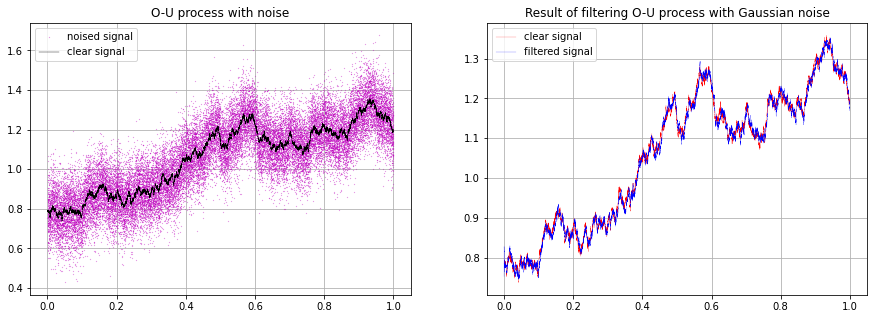

In [269]:
n = 2**15
sigma=1
theta = 0.05
t, X = OUProcess(sigma, theta, n)

r = 0.01
Y = GaussNoiser(X, r)


h = 1 / (n - 1)
a = np.exp(-theta * h)
q = sigma**2 * (1 - a**2)

X_filtered, err = KalmanFilter(Y, a, q, r)

# plot graphics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(t, Y, 'm.', alpha=1, ms = 0.3, label='noised signal')
ax1.plot(t, X, 'k', lw=0.4, label='clear signal')
ax1.set_title('O-U process with noise')
ax1.legend()
ax1.grid()
# plt.show()

ax2.plot(t, X, 'red', lw = 0.2, label='clear signal')
ax2.plot(t, X_filtered, 'blue', lw=0.2, label='filtered signal')
ax2.set_title('Result of filtering O-U process with Gaussian noise')
ax2.legend()
ax2.grid()
# plt.show()

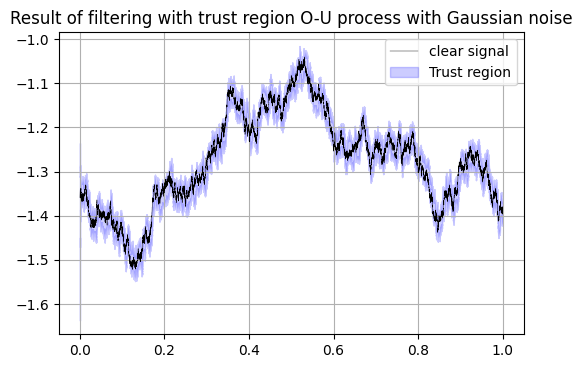

In [206]:
alpha = 0.05
delta = -np.sqrt(err) * scipy.stats.norm.ppf(alpha / 2)

# plot graphics
fig, ax = plt.subplots()
fig.dpi = 100

ax.fill_between(t, X_filtered - delta, X_filtered + delta, alpha=0.2, color='b', label='Trust region')
ax.plot(t, X, 'k', lw=0.3, label='clear signal')
plt.title('Result of filtering with trust region O-U process with Gaussian noise')
ax.legend()
ax.grid()
plt.show()

## Cauchy noise

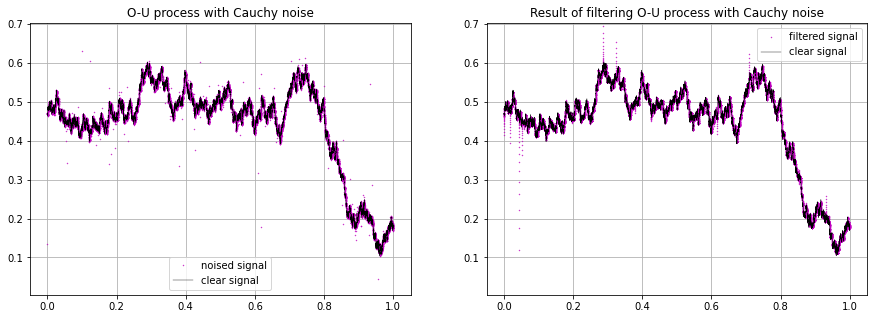

In [278]:
n = 2**15
sigma=1
theta = 0.05
t, X = OUProcess(sigma, theta, n)

r = 1e-4
Y = CauchyNoiser(X, r)


h = 1 / (n - 1)
a = np.exp(-theta * h)
q = sigma**2 * (1 - a**2)

X_filtered, err = KalmanFilter(Y, a, q, r)

# plot graphics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(t, Y, 'm.', ms=0.8, label='noised signal')
ax1.plot(t, X, 'k', lw=0.4, label='clear signal')
ax1.set_title('O-U process with Cauchy noise')
ax1.set_ylim(np.min(X) - 0.1, np.max(X) + 0.1)
ax1.legend()
ax1.grid()
# plt.show()

ax2.plot(t, X_filtered, 'm.', ms=0.8, label='filtered signal')
ax2.plot(t, X, 'k', lw = 0.4, label='clear signal')
ax2.set_title('Result of filtering O-U process with Cauchy noise')
ax2.set_ylim(np.min(X) - 0.1, np.max(X) + 0.1)
ax2.legend()
ax2.grid()
# plt.show()

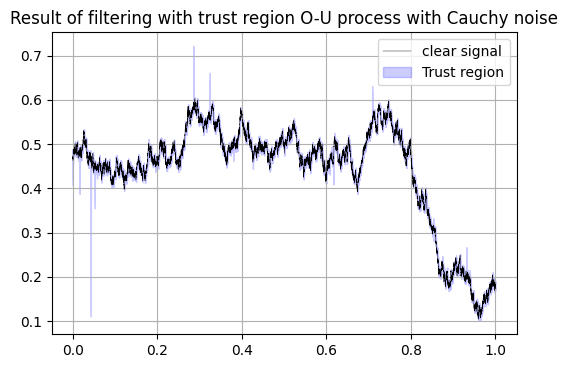

In [279]:
import scipy.stats

alpha = 0.05
delta = -np.sqrt(err) * scipy.stats.norm.ppf(alpha / 2)

# plot graphics
fig, ax = plt.subplots()
fig.dpi = 100

ax.fill_between(t, X_filtered - delta, X_filtered + delta, alpha=0.2, color='b', label='Trust region')
ax.plot(t, X, 'k', lw=0.3, label='clear signal')
plt.title('Result of filtering with trust region O-U process with Cauchy noise')
ax.legend()
ax.grid()
plt.show()

# Task 10 Пуассоновское поле

Построить двумерное пуассоновское поле, отвечающее сложному пуассоновскому процессу. Для каждой системы рассмотреть все возможные случаи поведения системы в зависимости от значения параметров.

Пусть $\lambda > 0.$. Случ. процесс $X_t$ называется однородным **пуассоновским процессом** (простым) с интенсивностью $\lambda$, если:
- $X(t)$ - процесс с независимыми приращениями
- $X(0) \overset{\text{п.н.}}{=} 0$
- $X(t + h) - X(t) \sim \mathcal{Pois}(\lambda h), \forall t \geq 0, h > 0$

Пусть $\xi_1, \dots, \xi_n$ — последовательность независимых одинаково распределённых случайных величин, а $N(t)$ —простой пуассоновский процесс с интенсивностью $\lambda$, не зависящий от последовательности $\xi_1, \dots, \xi_n$. Обозначим за $S_k$ сумму
первых $k$ элементов введённой последовательности. Тогда определим **сложный пуассоновский процесс** $X(t) = S_{N(t)}$.

## Task 10.1 СМО

Первая интерпретация: система массового обслуживания. При этом, первая координата поля - время поступления заявки в СМО (равномерное распределение), вторая - время ее обслуживания (распределение $\chi^2$ с 10 степенями свободы).

**Моделирование**:
1. Сгенерируем $n \sim Pois(\lambda T)$  - число заявок, поступивших в систему на временном интервале $[0, T]$, где $\lambda$ - интенсивность поступления заявок (среднее число новых заявок в единицу времени).

2. Сгенерируем (независимо) времена поступления заявок в СМО на временном интервале $[0, T]: t_1, \dots, t_n \sim U[0, T]$.
    Упорядочим времена поступления заявок по времени: $t_{(i)}$ - порядковая статистика, то есть $0 \leq t_{(1)} \leq \dots \leq t_{(n)} \leq T,$ и будем говорить, что $i$-ая заявка поступила в момент $t_{(i)}$.

    Сгенерируем (независимо) времена обработки заявок $s_i \sim \chi^2(10), \quad i=0,\dots, n$.
    
3. Для каждой заявки будем считать время завершения её обработки $X_i$.  
    - если к моменту поступления $i$-й заявки очереди нет (прошлую заявку успели обработать раньше: $X_{i-1} < t_{(i)}$ ), то
    $$X_i = t_{(i)} + s_i$$
    - иначе (при  $X_{i-1} \geq t_{(i)}$), 
    $$X_i = X_{(i-1)} + s_i$$
    
4. Также для каждой заявки будем считать количество людей в очереди $N(t)$.
    - если к моменту поступления $i$-й заявки очереди нет, то
    $N(t_{(i)}) = 0$
    - иначе $N(t_{(i)})$ равно числу заявок, еще не выполненных к моменту времени $t_{(i)}$.
    
   То есть $$N(t) = \sum_{j=1}^{n}[t_{(j)} \leq t < X_j].$$


Заметим, что время между заявками имеет экспоненциальное распределение с параметром $\lambda$, то есть среднее время между поступлением заявок равно $\dfrac{1}{\lambda}$. 
Значит, можно модифицировать 2 пункт:
2. Сгенерируем (независимо) времена поступления заявок в СМО на временном интервале $$[0, T]: 0 \leq t_{1} \leq \dots \leq t_{n} \leq T, \text{ причем } t_i - t_{i-1} \sim Exp(\lambda).$$  

Среднее время обработки одной заявки равно $\mathbb{E}s_1 = 10$. Cреднее время между поступлением заявок равно $\dfrac{1}{\lambda}$. Тогда:
- Если $\dfrac{1}{\lambda} < 10$, то заявки поступают с большей скоростью, чем успевают обрабатываться, и очередь будет бесконечно расти.
- Если $\dfrac{1}{\lambda} > 10 $, то скорость обработки превышает скорость поступления, система справляется с потоком заявок. 
- $\lambda = \dfrac{1}{10}$ соответствует некоторому промежуточному состоянию, при котором скорость поступления заявок совпадает со скоростью их обработки.

In [2]:
def QueuingSystem(lam, T, n_grid=10**2):
    n = np.random.poisson(lam * T)
    times = np.sort(T * np.random.rand(n))
    
    s = scipy.stats.chi2.rvs(df=10, size=n)
    X = s.copy()
    for i in range(1, n):
        X[i] += max(X[i - 1], times[i])

    # сделаем сетку по времени, чтобы посчитать число людей в очереди в каждый момент времени
    # так как всего заявок n, то между моментами i и i+1 поступления заявок может быть не больше i изменений числа людей
    # то есть максимально необходимый размер сетки порядка n^2
    n_grid = max(n*(n+1)//2, n_grid)
    t_grid = np.linspace(0, T, n_grid)
    N = np.zeros_like(t_grid)
    for i in range(n):
        N += (times[i] <= t_grid) * (t_grid < X[i])
    return times, s, X, N, t_grid

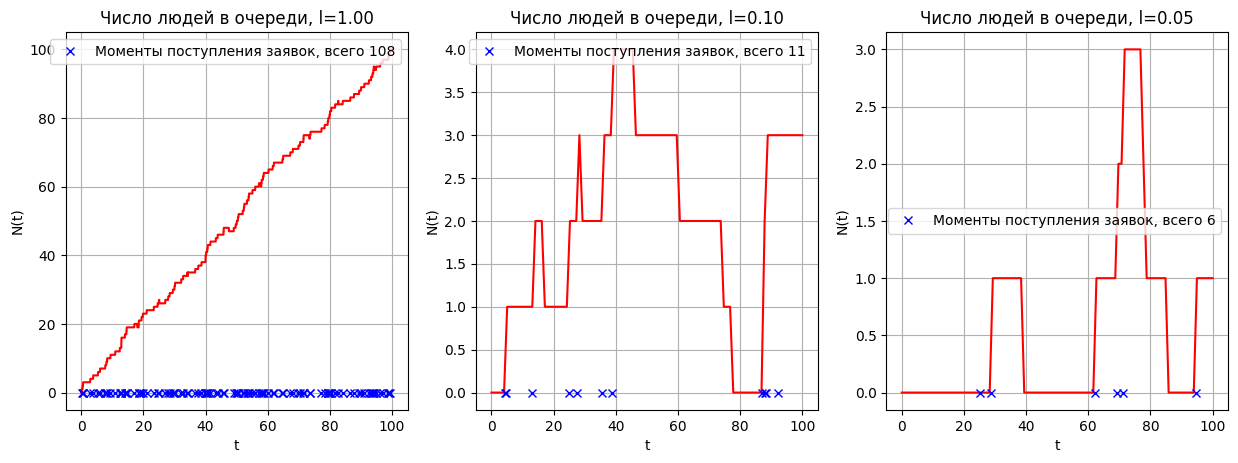

In [6]:
lam = [1, 0.1, 0.05]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.dpi = 100

for i in range(3):
    T = 100
    times, s, X, N, t_grid = QueuingSystem(lam[i], T)

    axes[i].plot(t_grid, N, 'r')
    axes[i].plot(times, np.zeros_like(times), 'xb', label='Моменты поступления заявок, всего {:d}'.format(X.shape[0]))
    axes[i].grid()
    axes[i].legend()
    axes[i].set_title('Число людей в очереди, l={:.2f}'.format(lam[i]))
    axes[i].set_xlabel('t')
    axes[i].set_ylabel('N(t)')

## Task 10.2 СМО с цикл. интенсивностью и единичными скачками

Вторая интерпретация: система массового обслуживания с циклической активностью $\lambda(1 + \cos(t))$ и единичными скачками. Свести данную задачу при помощи метода Льюиса и Шадлеара к моделированию двумерного пуассоновского поля, где первая координата имеет равномерное распределение, а вторая - распределение Бернулли.



Для моделировния СМО с циклической интенсивностью $\lambda(t) = \lambda(1 + \cos(t))$ будем использовать метод Льюиса и Шедлеара.  
Так как $\lambda(t) \leq 2\lambda = \lambda^*$ для любых $t$, будем использовать однородный пуассоновский процесс с интенсивностью $\lambda^*$. Опишем алгоритм моделирования.

1. Генерируем $n \sim Pois(\lambda^*T)$ и $t_1^*, \ldots, t_n^* \sim U[0, T]$ - времена поступления заявок в процессе*.
2. Для каждого $j$ оставляем $t_j^*$ в выборке с вероятностью $\dfrac{\lambda(t_j^*)}{\lambda^*(t_j^*)} = \dfrac{1+\cos(t)}{2}$.
3. Оставшиеся точки являются моментами поступления заявки в из прошлой ситуации, моделируем аналогично.


In [30]:
def QueuingSystemCycle(lam, T, n_grid=10**2):
    n = np.random.poisson(2 * lam * T)
    times = np.sort(T * np.random.rand(n))
    idx = np.random.rand(n) < (1 + np.cos(times)) / 2
    times = times[idx]
    n = len(times)
    
    s = scipy.stats.chi2.rvs(df=10, size=n)
    X = s.copy()
    for i in range(1, n):
        X[i] += max(X[i - 1], times[i])

#     n_grid = max(n*(n+1)//2, n_grid)
    n_grid = n
    t_grid = np.linspace(0, T, n_grid)
    N = np.zeros_like(t_grid)
    for i in range(n):
        N += (times[i] <= t_grid) * (t_grid < X[i])
    return times, s, X, N, t_grid

19961


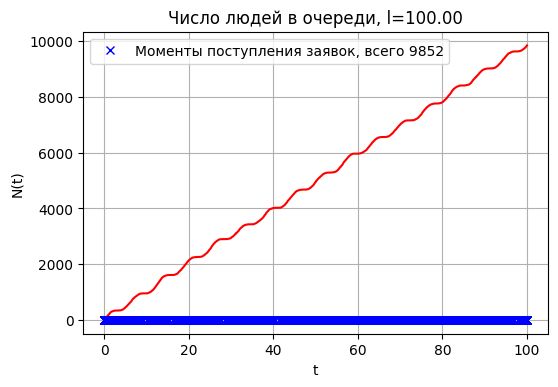

In [31]:
lam = 100

fig, axes = plt.subplots()
fig.dpi = 100

T = 100
times, s, X, N, t_grid = QueuingSystemCycle(lam, T)

axes.plot(t_grid, N, 'r')
axes.plot(times, np.zeros_like(times), 'xb', label='Моменты поступления заявок, всего {:d}'.format(X.shape[0]))
axes.grid()
axes.legend()
axes.set_title('Число людей в очереди, l={:.2f}'.format(lam))
axes.set_xlabel('t')
axes.set_ylabel('N(t)');

## Task 10.3 Работа страховой компании
Третья интерпретация: работа страховой компании. Первая координата - момент наступления страхового случая (равномерное распределение), вторая координата - величина ущерба (распределение Парето). Поступление капитала по времени линейно со скоростью $c > 0$, начальный капитал $W > 0$.

Сгенерируем $n \sim Pois(\lambda T)$  - число страховых случаев, наступивших в системе на временном интервале $[0, T]$, затем  времена наступления страховых случаев на этом интервале $$ 0 \leq t_{1} \leq \dots \leq t_{n} \leq T, \text{ причем } t_i - t_{i-1} \sim Exp(\lambda),$$  где $\lambda$ - интенсивность потока страховых случаев.

Величина ущерба $s_i$ от страхового случая в момент времени $t_i$ имеет распределение Парето с параметрами $x_m$ и $k$.

Величина капитала компании в момент времени t выражается как:
$$W(t) = W_0 + ct − S(t),$$
где $S(t)$ - сумма величин ущерба страховых случаев, произошедших в моменты времени $t_i : t_i \leq t$, то есть $S(t) = \sum \limits_{i : t_i \leq t} s_i$.  
Если в какой-то момент $\tau$ капитал $W(\tau)$ становится меньше нуля, то $W(t) = 0, \ t > \tau$.

Случайные величины $s_1, \ldots, s_n$ будем моделировать методом обращения функции распределения:
$$s_j = x_m(1 - U)^{-\frac{1}{k}} = x_m U^{-\frac{1}{k}} \sim Pareto(x_m, k), \quad U \sim U[0, 1].$$


In [441]:
def SimulateCapital(T, lam, x_m, k, W0, c, n_grid=10**2):
    n = np.random.poisson(lam * T)
    times = np.sort(np.random.rand(n) * T)
    
    t_grid = np.linspace(0, T, n_grid)
    s = x_m * np.random.rand(n)**(-1 / k)
    
    S_t = np.zeros_like(t_grid)
    for i in range(n):
        S_t += s[i] * (t[i] <= t_grid)
    
    W = W0 + c * t_grid - pois_proc_fun(t_grid, times, s)
    idx = np.where(W<0)
    if idx[0].size:
        W[idx[0][0]:] = 0
    return t_grid, W

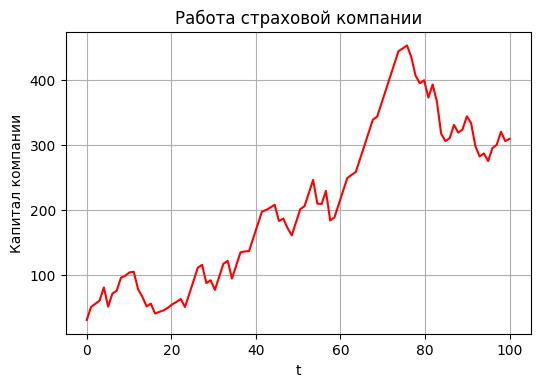

In [468]:
T = 100
lam = 1
x_m = 15
k = 10
W0 = 100
c = 20

t_grid, W = SimulateCapital(T, lam, x_m, k, w, c)

fig, ax = plt.subplots()
fig.dpi = 100

ax.plot(t_grid, W, 'r')
ax.grid()
ax.set_title('Работа страховой компании')
ax.set_xlabel('t')
ax.set_ylabel('Капитал компании')
plt.show()